In [3404]:
# Following is a Project in Data Analysis using Pandas. 
# My main questions for this project are, "How does number of packs smoked, smoking, age and other medical issues affect COPD, and how often do comorbities exist?" 
# I am using three datasets from Kaggle, including dataset.csv, to extract data to support my findings. I have merged my 3 datasets into one main dataset. 
# NOTE: due to time constraints, there are still analyses to be done after this project is submitted. This is an ongoing project.  

In [3405]:
# Import my pandas library modules and submodule pyplot that contain the features, benefits and applications needed for this project. 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3406]:
# DATASET 1

In [3407]:
# Import my first COPD dataset from Kaggle.
# First downloaded the zip file to my project folder. 
# Then unzipped with file with Zip Extractor Pro - Free.
# Once unzipped, loaded the file to create my first dataset 'copd_dataset1.

copd_dataset1 = pd.read_csv('dataset.csv')

In [3408]:
# Display the first 10 rows of the dataset to see the column names and get an idea of the data in the columns.
copd_dataset1.head(10)

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60,SEVERE,120,120,120,1,36,...,70,4,3,1,2,1,0,0,1,0
1,2,57,79,50,MODERATE,165,176,176,1,56,...,44,4,2,0,2,1,0,0,1,1
2,3,62,80,11,MODERATE,201,180,201,2,68,...,44,4,2,0,2,1,0,0,1,0
3,4,145,56,60,VERY SEVERE,210,210,210,0,14,...,62,1,4,1,2,0,0,1,1,0
4,5,136,65,68,SEVERE,204,210,210,1,42,...,76,1,3,1,2,0,1,1,0,0
5,6,84,67,26,MODERATE,216,180,216,1,50,...,74,2,2,0,1,1,0,0,1,0
6,7,93,67,50,SEVERE,214,237,237,1,35,...,77,2,3,0,1,1,0,0,1,0
7,8,27,83,90,SEVERE,214,237,237,1,32,...,45,4,3,1,2,1,0,0,1,0
8,9,114,72,50,MODERATE,231,237,237,2,63,...,70,3,2,1,1,1,0,0,1,0
9,10,152,75,6,SEVERE,226,240,240,1,46,...,56,3,3,0,2,0,1,0,0,0


In [3409]:
# Displaying the size of the data set and data types of the data in each column.
# This was used for troubleshooting. Found the steps/suggestion on Stock Overflow.

copd_dataset1_shape = copd_dataset1.shape
print(f'The Dataframe has {copd_dataset1_shape[0]} rows and {copd_dataset1_shape[1]} columns! \n')
print(copd_dataset1.info())

The Dataframe has 101 rows and 24 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          99 non-null     float64
 6   MWT2          100 non-null    float64
 7   MWT1Best      100 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null  

In [3410]:
# Test for missing values in the dataset.  
# Since it returned as True, I know I have missing values I need to deal with. 

print(copd_dataset1.isnull().any().any())

True


In [3411]:
# Check for empty cells (isnull) = true.
# Most of the fields show false. Opened the truncated result in a data editor to look closer. 
# This also lets me know there 101 rows and 24 columns. 

print(copd_dataset1.isnull().sum)

<bound method DataFrame.sum of      Unnamed: 0     ID    AGE  PackHistory  COPDSEVERITY   MWT1   MWT2  \
0         False  False  False        False         False  False  False   
1         False  False  False        False         False  False  False   
2         False  False  False        False         False  False  False   
3         False  False  False        False         False  False  False   
4         False  False  False        False         False  False  False   
..          ...    ...    ...          ...           ...    ...    ...   
96        False  False  False        False         False  False  False   
97        False  False  False        False         False  False  False   
98        False  False  False        False         False  False  False   
99        False  False  False        False         False  False  False   
100       False  False  False        False         False   True   True   

     MWT1Best   FEV1  FEV1PRED  ...   SGRQ  AGEquartiles   copd  gender  \
0    

In [3412]:
# Get column names for preparation to drop unnecessary columns.
copd_dataset1.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [3413]:
# Define my program to clean my dataset.
# Clean dataset with the function by dropping unnecessary columns and running dropna() to remove any rows containing null or NaN values. 
# Return the cleaned value for copd_dataset1
# Printed out dataset1 to make sure everything went as planned and see that now there are 99 rows adn 24 columns.  

def clean_cd(copd_dataset1):

   # Drop unnecessary columns that will not be needed in my analysis.
   cols_to_drop = ['MWT1','MWT2','FEV1', 'FEV1PRED', 'FVC','FVCPRED','AGEquartiles','CAT', 'HAD', 'SGRQ', 'gender','Diabetes','hypertension','muscular','AtrialFib']
   copd_dataset1 = copd_dataset1.drop(columns = cols_to_drop)

   #Drop rows with missing values.
   copd_dataset1 = copd_dataset1.dropna()
   return copd_dataset1

print(copd_dataset1)


     Unnamed: 0   ID  AGE  PackHistory COPDSEVERITY  MWT1  MWT2  MWT1Best  \
0             1   58   77           60       SEVERE   120   120       120   
1             2   57   79           50     MODERATE   165   176       176   
2             3   62   80           11     MODERATE   201   180       201   
3             4  145   56           60  VERY SEVERE   210   210       210   
4             5  136   65           68       SEVERE   204   210       210   
..          ...  ...  ...          ...          ...   ...   ...       ...   
96           97   10   68           25         MILD   511   575       575   
97           98   43   75           40         MILD   576   577       577   
98           99   74   68           30     MODERATE   468   582       582   
99          100  108   54           30       SEVERE   688   699       699   
100         101   85   78           55     MODERATE   NaN   NaN       NaN   

     FEV1  FEV1PRED  ...  SGRQ  AGEquartiles  copd  gender  smoking  Diabet

In [3414]:
# Call my function to clean my data, drop unnecessary columns, and print out the result to make sure the 
# correct columns were cleaned and dropped.

copd_dataset1_cleaned = clean_cd(copd_dataset1)
copd_dataset1_cleaned.head(10)


,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD
0,1,58,77,60,SEVERE,120,3,2,0
1,2,57,79,50,MODERATE,176,2,2,1
2,3,62,80,11,MODERATE,201,2,2,0
3,4,145,56,60,VERY SEVERE,210,4,2,0
4,5,136,65,68,SEVERE,210,3,2,0
5,6,84,67,26,MODERATE,216,2,1,0
6,7,93,67,50,SEVERE,237,3,1,0
7,8,27,83,90,SEVERE,237,3,2,0
8,9,114,72,50,MODERATE,237,2,1,0
9,10,152,75,6,SEVERE,240,3,2,0


In [3415]:
# Reset the index after null values have possibly been dropped.

copd_dataset1 = copd_dataset1.dropna().reset_index(drop=True)

In [3416]:
# DATASET 2

In [3417]:
# Import my second COPD dataset from Kaggle.
# This csv dataset is about Patient Risk Profiles.
# First downloaded the zip file to my Project folder. 
# Then unzipped with file with Zip Extractor Pro - Free.
# Once unzipped, loaded the file to create my second dataset 'copd_dataset2'.

copd_dataset2 = pd.read_csv('patient_risk_profiles.csv')

In [3418]:
# Display the first 10 rows of the 2nd dataset to see the column names and data in the columns just to get an idea of the 
# data and how many columns.

copd_dataset2.head(10)

,personId,age group: 10 - 14,age group: 15 - 19,age group: 20 - 24,age group: 65 - 69,age group: 40 - 44,age group: 45 - 49,age group: 55 - 59,age group: 85 - 89,age group: 75 - 79,...,predicted risk of Muscle weakness or injury,predicted risk of Ankylosing Spondylitis,predicted risk of Autoimmune hepatitis,predicted risk of Multiple Sclerosis,"predicted risk of Acute pancreatitis, with No chronic or hereditary or common causes of pancreatitis",predicted risk of Ulcerative colitis,predicted risk of Migraine,predicted risk of Dementia,predicted risk of Treatment resistant depression (TRD),"predicted risk of Parkinson's disease, inpatient or with 2nd diagnosis"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3419]:
# Test for missing values in the dataset.  
# Since it returned as False, missing values don't really need to be dealt with, but will run a dropna() in the cleaning function
# in case the dataset is expanded in the future.  

print(copd_dataset2.isnull().any().any())

False


In [3420]:
# Check for empty cells (isnull) = true.
# Most of the fields show false. Opened the truncated result in a data editor to look closer. 
# This also lets me know there 100 rows and 100 columns. 

print(copd_dataset2.isnull().sum)

<bound method DataFrame.sum of     personId  age group:  10 -  14  age group:  15 -  19  \
0      False                 False                 False   
1      False                 False                 False   
2      False                 False                 False   
3      False                 False                 False   
4      False                 False                 False   
..       ...                   ...                   ...   
95     False                 False                 False   
96     False                 False                 False   
97     False                 False                 False   
98     False                 False                 False   
99     False                 False                 False   

    age group:  20 -  24  age group:  65 -  69  age group:  40 -  44  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False        

In [3421]:
# Get column names to prepare to drop (keep) unnecessary columns.  
# NOTE: Tried to use a keep instead of drop but could not get it to work.  After many hours, decided to just print ALL columns, 
# print the column names in the text editor, then copy and paste the ones to drop. 
# Someday in the future will revisit the keep function. 

copd_dataset2.columns

Index(['personId', 'age group:  10 -  14', 'age group:  15 -  19',
       'age group:  20 -  24', 'age group:  65 -  69', 'age group:  40 -  44',
       'age group:  45 -  49', 'age group:  55 -  59', 'age group:  85 -  89',
       'age group:  75 -  79', 'age group:   5 -   9', 'age group:  25 -  29',
       'age group:   0 -   4', 'age group:  70 -  74', 'age group:  50 -  54',
       'age group:  60 -  64', 'age group:  35 -  39', 'age group:  30 -  34',
       'age group:  80 -  84', 'age group:  90 -  94', 'Sex = FEMALE',
       'Sex = MALE', 'Acetaminophen exposures in prior year',
       'Occurrence of Alcoholism in prior year', 'Anemia in prior year',
       'Angina events in prior year', 'ANTIEPILEPTICS in prior year',
       'Occurrence of Anxiety in prior year', 'Osteoarthritis in prior year',
       'Aspirin exposures in prior year', 'Occurrence of Asthma in prior year',
       'Atrial Fibrillation, incident in prior year',
       'HORMONAL CONTRACEPTIVES in prior year',
  

In [3422]:
# Define my function to clean my dataset.
# Clean 'copd_dataset2' by dropping unnecessary columns and running a dropna() in case the database is expanded in the future. 

def clean_cd1(copd_dataset2):

    #Drop unnessary columns that will not be needed in my analysis and keep the ones that will.
    
    columns_to_drop = ['age group:  10 -  14', 'age group:  15 -  19', 'age group:  20 -  24', 'age group:  65 -  69', 'age group:  40 -  44', 'age group:  45 -  49', 'age group:  55 -  59', 'age group:  85 -  89', 'age group:  75 -  79', 'age group:   5 -   9', 'age group:  25 -  29', 'age group:   0 -   4', 'age group:  70 -  74', 'age group:  50 -  54', 'age group:  60 -  64', 'age group:  35 -  39', 'age group:  30 -  34', 'age group:  80 -  84', 'age group:  90 -  94','Acetaminophen exposures in prior year',
       'Occurrence of Alcoholism in prior year', 'Anemia in prior year',
       'Angina events in prior year', 'ANTIEPILEPTICS in prior year',
       'Occurrence of Anxiety in prior year', 'Osteoarthritis in prior year',
       'Aspirin exposures in prior year', 'Occurrence of Asthma in prior year',
       'Atrial Fibrillation, incident in prior year',
       'HORMONAL CONTRACEPTIVES in prior year', 'Sex = FEMALE',
       'Any cancer (excl. prostate cancer and benign cancer) in prior year',
       'Acute Kidney Injury (AKI) in prior year',
       'Chronic kidney disease or end stage renal disease in prior year',
       'Major depressive disorder, with NO occurrence of certain psychiatric disorder in prior year',
       'Type 1 diabetes and no prior specific non-T1DM diabetes in prior year',
       'Type 2 Diabetes Mellitus (DM), with no type 1 or secondary DM in prior year',
       'Deep Vein Thrombosis (DVT) in prior year', 'Dyspnea in prior year',
       'Edema in prior year', 'Gastroesophageal reflux disease in prior year',
       'Acute gastrointestinal (GI) bleeding in prior year',
       'Heart valve disorder in prior year', 'Chronic hepatitis in prior year',
       'Hyperlipidemia in prior year', 'Hypertension in prior year',
       'Hypothyroidism in prior year',
       'Inflammatory Bowel Disease in prior year',
       'Low back pain in prior year', 'Occurrence of neuropathy in prior year',
       'Obesity in prior year', 'Opioids in prior year',
       'Osteoporosis in prior year',
       'Peripheral vascular disease in prior year', 'Pneumonia in prior year',
       'Psychotic disorder in prior year',
       'Acute Respiratory failure in prior year',
       'Rheumatoid Arthritis in prior year', 'Seizure in prior year',
       'Sepsis in prior year', 'Skin ulcer in prior year',
       'Sleep apnea in prior year', 'Smoking in prior year',
       'STEROIDS in prior year',
       'Hemorrhagic stroke in an inpatient setting in prior year',
       'Non-hemorrhagic Stroke in an inpatient setting in prior year',
       'Urinary tract infectious disease in prior year',
       'Antibiotics Carbapenems in prior year',
       'Antibiotics Aminoglycosides in prior year',
       'Antibiotics Cephalosporins in prior year',
       'Antibiotics Fluoroquinolones in prior year',
       'Antibiotics Glycopeptides and lipoglycopeptides in prior year',
       'Antibiotics Macrolides in prior year',
       'Antibiotics Monobactams in prior year',
       'Antibiotics Oxazolidinones in prior year',
       'Antibiotics Penicillins in prior year',
       'Antibiotics Polypeptides in prior year',
       'Antibiotics Rifamycins in prior year',
       'Antibiotics Sulfonamides in prior year',
       'Antibiotics Streptogramins in prior year',
       'Antibiotics Tetracyclines in prior year',
       'predicted risk of Pulmonary Embolism',
       'predicted risk of Sudden Hearing Loss, No congenital anomaly or middle or inner ear conditions',
       'predicted risk of Restless Leg Syndrome',
       'predicted risk of Sudden Vision Loss, with no eye pathology causes',
       'predicted risk of Muscle weakness or injury',
       'predicted risk of Ankylosing Spondylitis', 
       'predicted risk of Autoimmune hepatitis',
       'predicted risk of Multiple Sclerosis',
       'predicted risk of Acute pancreatitis, with No chronic or hereditary or common causes of pancreatitis',
       'predicted risk of Ulcerative colitis', 'predicted risk of Migraine',
       'predicted risk of Dementia',
       'predicted risk of  Treatment resistant depression (TRD)',"predicted risk of Parkinson's disease, inpatient or with 2nd diagnosis"]
   
    copd_dataset2 = copd_dataset2.drop(columns=columns_to_drop, errors = 'ignore')
    
    # Drop rows with missing values.
    copd_dataset2 = copd_dataset2.dropna()
      
    # Return the cleaned copd_dataset2

    return copd_dataset2



In [3423]:
# call my function to clean my data, drop unnecessary columns, and display the first 10 rows to 
# make sure the correct columns were cleaned and dropped.

copd_dataset2_cleaned = clean_cd1(copd_dataset2)
copd_dataset2_cleaned.head(10)

,personId,Sex = MALE,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year
0,1,0,0,0,0
1,2,1,0,0,0
2,3,1,0,0,1
3,4,1,1,0,0
4,5,1,0,1,0
5,6,1,0,0,1
6,7,0,1,0,0
7,8,0,0,0,0
8,9,0,0,0,0
9,10,1,0,0,0


In [3424]:
# Reset the index after null values have possibly been dropped.

copd_dataset2 = copd_dataset2.dropna().reset_index(drop=True)

In [3425]:
# Rename the 'Sex = Male' column to 'male/female' so it can be merged with the 'male/female' column when 
# joined in merged_copd_dataset2 with copd_dataset3.

copd_dataset2_cleaned = copd_dataset2_cleaned.rename(columns={'Sex = MALE':'male/female'})


In [3426]:
# Rename the personID to ID so I can join on this column with copd_dataset1.

copd_dataset2_cleaned = copd_dataset2_cleaned.rename(columns={'personId':'ID'})

In [3427]:
# Get a picture of my remaining columns to make sure everything went as planned. 

copd_dataset2_cleaned.columns

Index(['ID', 'male/female', 'Heart failure in prior year',
       'Chronic obstructive pulmonary disease (COPD) in prior year',
       'Coronary artery disease (CAD) in prior year'],
      dtype='object')

In [3428]:
# print out my dataset to get see what it looks like.  At this point I was mainly concerned with how the male/female
# data was listed. 
# The 1's and 0's will need to be converted to male for 1, and female for a 0.  Decided to wait and deal with this in 
# the final merged dataset (merged_dataset2).

print(copd_dataset2_cleaned)

     ID  male/female  Heart failure in prior year  \
0     1            0                            0   
1     2            1                            0   
2     3            1                            0   
3     4            1                            1   
4     5            1                            0   
..  ...          ...                          ...   
95   96            0                            0   
96   97            1                            0   
97   98            1                            1   
98   99            1                            0   
99  100            1                            1   

    Chronic obstructive pulmonary disease (COPD) in prior year  \
0                                                   0            
1                                                   0            
2                                                   0            
3                                                   0            
4                                

In [3429]:
# BEGIN "MERGED DATASET 1" by joining 'copd_dataset1_cleaned' with 'copd_dataset2_cleaned' with a Left join on ID 
# Key column.

merged_copd_dataset1 = pd.merge(copd_dataset1_cleaned, copd_dataset2_cleaned, on = 'ID', how= 'left')

In [3430]:
# Print the first 10 rows of my merged dataset to make sure the merge was successful and there are no missing columns.

merged_copd_dataset1.head(10)

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD,male/female,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year
0,1,58,77,60,SEVERE,120,3,2,0,1,1,1,0
1,2,57,79,50,MODERATE,176,2,2,1,1,0,0,0
2,3,62,80,11,MODERATE,201,2,2,0,1,0,0,1
3,4,145,56,60,VERY SEVERE,210,4,2,0,NaN,NaN,NaN,NaN
4,5,136,65,68,SEVERE,210,3,2,0,NaN,NaN,NaN,NaN
5,6,84,67,26,MODERATE,216,2,1,0,0,0,0,0
6,7,93,67,50,SEVERE,237,3,1,0,1,1,0,0
7,8,27,83,90,SEVERE,237,3,2,0,1,0,0,0
8,9,114,72,50,MODERATE,237,2,1,0,NaN,NaN,NaN,NaN
9,10,152,75,6,SEVERE,240,3,2,0,NaN,NaN,NaN,NaN


In [3431]:
# Print the dataset to get an idea of what kind of data is in each field and if it is in the correct format(s).  Also,
# it gives me the number of rows and columns.

print(merged_copd_dataset1)

    Unnamed: 0   ID  AGE  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  \
0            1   58   77           60       SEVERE       120     3        2   
1            2   57   79           50     MODERATE       176     2        2   
2            3   62   80           11     MODERATE       201     2        2   
3            4  145   56           60  VERY SEVERE       210     4        2   
4            5  136   65           68       SEVERE       210     3        2   
..         ...  ...  ...          ...          ...       ...   ...      ...   
95          96   12   72           30     MODERATE       558     2        2   
96          97   10   68           25         MILD       575     1        2   
97          98   43   75           40         MILD       577     1        2   
98          99   74   68           30     MODERATE       582     2        2   
99         100  108   54           30       SEVERE       699     3        2   

    IHD  male/female  Heart failure in prior year  

In [3432]:
# Test for missing values. Since it is returning True, I will need to deal with the missing data.  In this case, 
# I will drop the rows with missing values when I clean the dataset with my formula. 

print(merged_copd_dataset1.isnull().any().any())

True


In [3433]:
# Check for empty cells (isnull) = true to get an idea of where the True's are. 

print(merged_copd_dataset1.isnull().sum)

<bound method DataFrame.sum of     Unnamed: 0     ID    AGE  PackHistory  COPDSEVERITY  MWT1Best   copd  \
0        False  False  False        False         False     False  False   
1        False  False  False        False         False     False  False   
2        False  False  False        False         False     False  False   
3        False  False  False        False         False     False  False   
4        False  False  False        False         False     False  False   
..         ...    ...    ...          ...           ...       ...    ...   
95       False  False  False        False         False     False  False   
96       False  False  False        False         False     False  False   
97       False  False  False        False         False     False  False   
98       False  False  False        False         False     False  False   
99       False  False  False        False         False     False  False   

    smoking    IHD  male/female  Heart failure in prior 

In [3434]:
# This column was to see more specifically where the NaN values were. When I start performing a deeper analysis, this
# will be important. I may decide to fill some of the fields/rows with some place holder data. 

columns_with_NaN = merged_copd_dataset1.isna().any()
print(columns_with_NaN)

Unnamed: 0                                                    False
ID                                                            False
AGE                                                           False
PackHistory                                                   False
COPDSEVERITY                                                  False
MWT1Best                                                      False
copd                                                          False
smoking                                                       False
IHD                                                           False
male/female                                                    True
Heart failure in prior year                                    True
Chronic obstructive pulmonary disease (COPD) in prior year     True
Coronary artery disease (CAD) in prior year                    True
dtype: bool


In [3435]:
# Define my function to clean my data.
# Name my function (clean_cd2), add the steps to clean the data, then return the cleaned merged_copd_dataset1 
# (merged_copd_dataset1_cleaned)

def clean_cd2(merged_copd_dataset1):
    
    # Drop rows with missing values.
    merged_copd_dataset1 = merged_copd_dataset1.dropna()

    # Return the cleaned merged_copd_dataset1
    return merged_copd_dataset1

print(merged_copd_dataset1)

    Unnamed: 0   ID  AGE  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  \
0            1   58   77           60       SEVERE       120     3        2   
1            2   57   79           50     MODERATE       176     2        2   
2            3   62   80           11     MODERATE       201     2        2   
3            4  145   56           60  VERY SEVERE       210     4        2   
4            5  136   65           68       SEVERE       210     3        2   
..         ...  ...  ...          ...          ...       ...   ...      ...   
95          96   12   72           30     MODERATE       558     2        2   
96          97   10   68           25         MILD       575     1        2   
97          98   43   75           40         MILD       577     1        2   
98          99   74   68           30     MODERATE       582     2        2   
99         100  108   54           30       SEVERE       699     3        2   

    IHD  male/female  Heart failure in prior year  

In [3436]:
# call my function to clean my data, drop unnecessary rows, return the cleaned dataset and print out the result 
# to make sure the correct rows were dropped, and all went as expected. 

merged_copd_dataset1_cleaned = clean_cd2(merged_copd_dataset1)
merged_copd_dataset1_cleaned.head(10)

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD,male/female,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year
0,1,58,77,60,SEVERE,120,3,2,0,1,1,1,0
1,2,57,79,50,MODERATE,176,2,2,1,1,0,0,0
2,3,62,80,11,MODERATE,201,2,2,0,1,0,0,1
5,6,84,67,26,MODERATE,216,2,1,0,0,0,0,0
6,7,93,67,50,SEVERE,237,3,1,0,1,1,0,0
7,8,27,83,90,SEVERE,237,3,2,0,1,0,0,0
12,13,49,64,30,VERY SEVERE,246,4,2,0,1,0,0,0
13,14,80,74,75,MILD,270,1,1,0,0,0,0,0
16,17,41,69,78,SEVERE,273,3,2,0,1,0,0,0
17,18,1,55,109,MODERATE,281,2,2,0,0,0,0,0


In [3437]:
# Reset the index after null values have been dropped.

merged_copd_dataset1_cleaned = merged_copd_dataset1_cleaned.dropna().reset_index(drop=True)

In [3438]:
# Make sure all or several rows did not get dropped in my cleaning process. 

merged_copd_dataset1_cleaned.shape

(56, 13)

In [3439]:
# Rename the 'Sex = MALE' column to 'male/female' so it can be merged with the same field in dataset3 when 
# merged_copd_dataset1_cleaned is merged with copd_dataset3_cleaned. 

merged_copd_dataset1_cleaned = merged_copd_dataset1_cleaned.rename(columns={'Sex = MALE':'male/female'})

In [3440]:
# Change the 0.0 values to female and the 1.0 values to male to match the data in the male/female column in 
# copd_dataset3.  
# Note, there is a warning that this may not work (in the future).  Attempted with iLoc but
# could not get it to work, so just left it as is for now because it is working.

merged_copd_dataset1_cleaned['male/female'].replace({'0.0' : 'female', '1.0' : 'male'}, inplace=True)

C:\Users\trish\AppData\Local\Temp\ipykernel_20588\2206383854.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_copd_dataset1_cleaned['male/female'].replace({'0.0' : 'female', '1.0' : 'male'}, inplace=True)


In [3441]:
# Trying to find where my formatting changes from float:0 to a float:2. Ended up using .astype(int) for several columns,
# one at a time. 

print(merged_copd_dataset1_cleaned)

    Unnamed: 0  ID  AGE  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  \
0            1  58   77           60       SEVERE       120     3        2   
1            2  57   79           50     MODERATE       176     2        2   
2            3  62   80           11     MODERATE       201     2        2   
3            6  84   67           26     MODERATE       216     2        1   
4            7  93   67           50       SEVERE       237     3        1   
5            8  27   83           90       SEVERE       237     3        2   
6           13  49   64           30  VERY SEVERE       246     4        2   
7           14  80   74           75         MILD       270     1        1   
8           17  41   69           78       SEVERE       273     3        2   
9           18   1   55          109     MODERATE       281     2        2   
10          22  48   75           40  VERY SEVERE       297     4        1   
11          24  15   73           75       SEVERE       300     

In [3442]:
# DATASET 3 STARTS HERE

In [3443]:
# Import my third COPD dataset from Kaggle.
# This csv dataset is about Respiratory Symptoms and Treatment.
# First, I downloaded the zip file to my Project folder. 
# Then unzipped with file with Zip Extractor Pro - Free.
# Once unzipped, loaded/read in the file to create my third dataset 'copd_dataset3'.

copd_dataset3 = pd.read_csv('respiratory symptoms and treatment.csv')

In [3444]:
# Display the first 10 rows of the 3rd dataset to see the column names and data in the columns.

copd_dataset3.head(10)

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4,female,Asthma,Mepolizumab,high
2,wheezing,6,male,Asthma,Mepolizumab,high
3,shortness of breath,7,male,Asthma,Mepolizumab,high
4,shortness of breath,9,male,Asthma,Mepolizumab,high
5,tight feeling in the chest,NaN,male,Asthma,Mepolizumab,high
6,shortness of breath,NaN,male,Asthma,Mepolizumab,high
7,tight feeling in the chest,8,female,Asthma,Mepolizumab,high
8,shortness of breath,36,female,Asthma,Mepolizumab,medium
9,wheezing,40,female,Asthma,Omalizumab,medium


In [3445]:
# Test for missing values.

print(copd_dataset3.isnull().any().any())

True


In [3446]:
# Check for empty cells (isnull) = true.

print(copd_dataset3.isnull().sum)

<bound method DataFrame.sum of        Symptoms    Age    Sex  Disease  Treatment  Nature
0         False  False  False    False      False   False
1         False  False  False    False      False   False
2         False  False  False    False      False   False
3         False  False  False    False      False   False
4         False  False  False    False      False   False
...         ...    ...    ...      ...        ...     ...
38532     False  False  False    False      False   False
38533     False  False  False    False      False   False
38534     False  False  False    False      False   False
38535     False  False  False    False      False   False
38536     False  False  False    False      False   False

[38537 rows x 6 columns]>


In [3447]:
# Get column names in preparation to drop unnecessary columns in my cleaning function. 

copd_dataset3.columns

Index(['Symptoms', 'Age', 'Sex', 'Disease', 'Treatment', 'Nature'], dtype='object')

In [3448]:
# Get a picture of the Disease column so I know what conditions are irrelevant and need to be dropped. 

copd_dataset3['Disease'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Asthma
1              Asthma
2              Asthma
3              Asthma
4              Asthma
             ...     
38532    Tuberculosis
38533    Tuberculosis
38534    Tuberculosis
38535    Tuberculosis
38536    Tuberculosis
Name: Disease, Length: 38537, dtype: object>

In [3449]:
# Define my program to clean my dataset.  
# Name the function (clean_cd3), enter the body (steps to take to clean the data), and return the cleaned dataset. 

def clean_cd3(copd_dataset3):

   # Drop unnecessary columns that will not be needed in my analysis.
   cols_to_drop = ['Nature']
   copd_dataset3 = copd_dataset3.drop(columns = cols_to_drop)

   if copd_dataset3.isnull().any().any():

      copd_dataset3 = copd_dataset3.dropna()  
      print("Rows with NaN values = True have been dropped.")
   else:
      print("No missing values found.")


   # Drop rows unnecessary rows
   copd_dataset3 = copd_dataset3.dropna()

   return copd_dataset3

print(copd_dataset3)

                                             Symptoms  Age     Sex  \
0                                           coughing     5  female   
1                          tight feeling in the chest    4  female   
2                                            wheezing    6    male   
3                                 shortness of breath    7    male   
4                                 shortness of breath    9    male   
...                                               ...  ...     ...   
38532        A cough that lasts more than three weeks   45  female   
38533  Loss of appetite and unintentional weight loss   43  female   
38534                                           Fever   41  female   
38535                                          Chills   53  female   
38536                                    Night sweats   63  female   

            Disease    Treatment Nature  
0            Asthma   Omalizumab   high  
1            Asthma  Mepolizumab   high  
2            Asthma  Mepolizumab 

In [3450]:
# Call my function to clean my data, drop unnecessary columns, rows with NaN and return the cleaned dataset. 
# and print out the result to make sure the correct columns were cleaned and dropped.

copd_dataset3_cleaned = clean_cd3(copd_dataset3)
copd_dataset3_cleaned.head(10)

Rows with NaN values = True have been dropped.


,Symptoms,Age,Sex,Disease,Treatment
0,coughing,5,female,Asthma,Omalizumab
1,tight feeling in the chest,4,female,Asthma,Mepolizumab
2,wheezing,6,male,Asthma,Mepolizumab
3,shortness of breath,7,male,Asthma,Mepolizumab
4,shortness of breath,9,male,Asthma,Mepolizumab
7,tight feeling in the chest,8,female,Asthma,Mepolizumab
8,shortness of breath,36,female,Asthma,Mepolizumab
9,wheezing,40,female,Asthma,Omalizumab
10,coughing,46,female,Asthma,Omalizumab
11,shortness of breath,56,female,Asthma,Omalizumab


In [3451]:
# Reset the index after null values have been dropped

copd_dataset3 = copd_dataset3.dropna().reset_index(drop=True)

In [3452]:
# Get the names of the columns to make sure all went as planned. 

copd_dataset3_cleaned.columns

Index(['Symptoms', 'Age', 'Sex', 'Disease', 'Treatment'], dtype='object')

In [3453]:
# Print the dataset to make sure the data and types are correct.

print(copd_dataset3_cleaned)

                                             Symptoms  Age     Sex  \
0                                           coughing     5  female   
1                          tight feeling in the chest    4  female   
2                                            wheezing    6    male   
3                                 shortness of breath    7    male   
4                                 shortness of breath    9    male   
...                                               ...  ...     ...   
38532        A cough that lasts more than three weeks   45  female   
38533  Loss of appetite and unintentional weight loss   43  female   
38534                                           Fever   41  female   
38535                                          Chills   53  female   
38536                                    Night sweats   63  female   

            Disease    Treatment  
0            Asthma   Omalizumab  
1            Asthma  Mepolizumab  
2            Asthma  Mepolizumab  
3            Asthma

In [3454]:
# Create my second merged dataset (merged_copd_dataset2) by joining 'merged_copd_dataset1' with 'copd_dataset3' 
# using concat based on the Index column as the key to combine all rows from both datasets with concat.

merged_copd_dataset2 = pd.concat([merged_copd_dataset1_cleaned, copd_dataset3_cleaned], axis = 1)


# Merge the 2 Age columns from the joined datasets, name the new combined column 'Ages'.

merged_copd_dataset2['Ages'] = merged_copd_dataset2[['AGE','Age']].bfill(axis = 1).iloc[:,0]
merged_copd_dataset2.drop(columns=['AGE','Age'], inplace=True)


# Merge the 'male/female' column with 'Sex' from the joined datasets, name the new combined column 'Male/Female'.

merged_copd_dataset2['Male/Female'] = merged_copd_dataset2[['male/female','Sex']].bfill(axis = 1).iloc[:,0]
merged_copd_dataset2.drop(columns=['male/female','Sex'], inplace=True)


# Print the merged dataset to make sure all went as planned. 

print(merged_copd_dataset2)

       Unnamed: 0  ID  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  IHD  \
0               1  58           60       SEVERE       120     3        2    0   
1               2  57           50     MODERATE       176     2        2    1   
2               3  62           11     MODERATE       201     2        2    0   
3               6  84           26     MODERATE       216     2        1    0   
4               7  93           50       SEVERE       237     3        1    0   
...           ...  ..          ...          ...       ...   ...      ...  ...   
38532         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38533         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38534         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38535         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38536         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   

       Heart failure in pri

C:\Users\trish\AppData\Local\Temp\ipykernel_20588\2849414749.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_copd_dataset2['Male/Female'] = merged_copd_dataset2[['male/female','Sex']].bfill(axis = 1).iloc[:,0]


In [3455]:
# Rename the 'Unnamed: 0' column to 'Index' because it is more meaningful and fits better when printed out.

merged_copd_dataset2 = merged_copd_dataset2.rename(columns={'Unnamed: 0':'Index'})

In [3456]:
# Take a look at the columns to make sure the column merges were executed as planned. 

merged_copd_dataset2.columns

Index(['Index', 'ID', 'PackHistory', 'COPDSEVERITY', 'MWT1Best', 'copd',
       'smoking', 'IHD', 'Heart failure in prior year',
       'Chronic obstructive pulmonary disease (COPD) in prior year',
       'Coronary artery disease (CAD) in prior year', 'Symptoms', 'Disease',
       'Treatment', 'Ages', 'Male/Female'],
      dtype='object')

In [3457]:
# Define my function to clean my dataset.
# Name my function (clean_cd4), drop Rows with missing values, convert the numbers in 'Male/Female' from float numbers 
# objects, then return the cleaned merged_copd_dataset2. 

def clean_cd4(merged_copd_dataset2):

   #Drop rows with missing values.
   merged_copd_dataset2 = merged_copd_dataset2.dropna()

   # Convert 'male/female' column values from a float number to an object, female for 0.0, and male for 1.0.
   if 'Male/Female' in merged_copd_dataset2:
     merged_copd_dataset2['Male/Female'] = merged_copd_dataset2['Male/Female'].map({1.0: 'male', 0.0: 'female'})

   # Return the cleaned dataset. 
   return merged_copd_dataset2

# Print the cleaned dataset to make sure all went as planned.  
print(merged_copd_dataset2)

       Index  ID  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  IHD  \
0          1  58           60       SEVERE       120     3        2    0   
1          2  57           50     MODERATE       176     2        2    1   
2          3  62           11     MODERATE       201     2        2    0   
3          6  84           26     MODERATE       216     2        1    0   
4          7  93           50       SEVERE       237     3        1    0   
...      ...  ..          ...          ...       ...   ...      ...  ...   
38532    NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38533    NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38534    NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38535    NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
38536    NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   

       Heart failure in prior year  \
0                                1   
1          

In [3458]:
# call my function to clean my data, drop unnecessary columns, and print out the result to make sure the 
# correct columns were cleaned and dropped.

merged_copd_dataset2_cleaned = clean_cd4(merged_copd_dataset2)
merged_copd_dataset2_cleaned.head(10)

C:\Users\trish\AppData\Local\Temp\ipykernel_20588\3385074476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_copd_dataset2['Male/Female'] = merged_copd_dataset2['Male/Female'].map({1.0: 'male', 0.0: 'female'})


,Index,ID,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year,Symptoms,Disease,Treatment,Ages,Male/Female
0,1,58,60,SEVERE,120,3,2,0,1,1,0,coughing,Asthma,Omalizumab,77,male
1,2,57,50,MODERATE,176,2,2,1,0,0,0,tight feeling in the chest,Asthma,Mepolizumab,79,male
2,3,62,11,MODERATE,201,2,2,0,0,0,1,wheezing,Asthma,Mepolizumab,80,male
3,6,84,26,MODERATE,216,2,1,0,0,0,0,shortness of breath,Asthma,Mepolizumab,67,female
4,7,93,50,SEVERE,237,3,1,0,1,0,0,shortness of breath,Asthma,Mepolizumab,67,male
7,14,80,75,MILD,270,1,1,0,0,0,0,tight feeling in the chest,Asthma,Mepolizumab,74,female
8,17,41,78,SEVERE,273,3,2,0,0,0,0,shortness of breath,Asthma,Mepolizumab,69,male
9,18,1,109,MODERATE,281,2,2,0,0,0,0,wheezing,Asthma,Omalizumab,55,female
10,22,48,40,VERY SEVERE,297,4,1,0,0,0,0,coughing,Asthma,Omalizumab,75,male
11,24,15,75,SEVERE,300,3,2,0,0,0,1,shortness of breath,Asthma,Omalizumab,73,male


In [3459]:
# Reset the index after null values have been dropped

merged_copd_dataset2_cleaned = merged_copd_dataset2_cleaned.dropna().reset_index(drop=True)

In [3460]:
# Change the float number :2 to an int. 

merged_copd_dataset2_cleaned['Index'] = merged_copd_dataset2_cleaned['Index'].astype(int)

In [3461]:
# Change the float number :2 to an int. 

merged_copd_dataset2_cleaned['ID'] = merged_copd_dataset2_cleaned['ID'].astype(int)

In [3462]:
# Change the float number :2 to an int. 

merged_copd_dataset2_cleaned['PackHistory'] = merged_copd_dataset2_cleaned['PackHistory'].astype(int)

In [3463]:
# Change the float number :2 to an int. 

merged_copd_dataset2_cleaned['MWT1Best'] = merged_copd_dataset2_cleaned['MWT1Best'].astype(int)

In [3464]:
# Change the float number :2 to an int. 

merged_copd_dataset2_cleaned['copd'] = merged_copd_dataset2_cleaned['copd'].astype(int)

In [3465]:
# Change the float number :2 to an int. 

merged_copd_dataset2_cleaned['smoking'] = merged_copd_dataset2_cleaned['smoking'].astype(int)

In [3466]:
# Change the float number :2 to an int. 

merged_copd_dataset2_cleaned['IHD'] = merged_copd_dataset2_cleaned['IHD'].astype(int)

In [3467]:
# Take a look at the merged data and see how many rows are left. 

print(merged_copd_dataset2_cleaned)

    Index  ID  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  IHD  \
0       1  58           60       SEVERE       120     3        2    0   
1       2  57           50     MODERATE       176     2        2    1   
2       3  62           11     MODERATE       201     2        2    0   
3       6  84           26     MODERATE       216     2        1    0   
4       7  93           50       SEVERE       237     3        1    0   
5      14  80           75         MILD       270     1        1    0   
6      17  41           78       SEVERE       273     3        2    0   
7      18   1          109     MODERATE       281     2        2    0   
8      22  48           40  VERY SEVERE       297     4        1    0   
9      24  15           75       SEVERE       300     3        2    0   
10     25  70           45         MILD       300     1        2    0   
11     26  63           67     MODERATE       305     2        2    0   
12     27  81           38       SEVERE       312  

In [3468]:
# Run the 0verall description of the whole final merged dataset to get a picture of the data.  At first it printed out with 
# 6 data places. The steps to format the described data were found on Stack Overflow.

pd.set_option('display.float_format', lambda x: '%.0f' % x)

merged_copd_dataset2_cleaned.describe()


,Index,ID,PackHistory,MWT1Best,copd,smoking,IHD,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year,Ages
count,52,52,52,52,52,52,52,52,52,52,52
mean,49,54,41,394,2,2,0,0,0,0,71
std,28,27,25,104,1,0,0,0,0,0,8
min,1,1,1,120,1,1,0,0,0,0,44
25%,28,36,20,330,2,2,0,0,0,0,66
50%,44,58,38,401,2,2,0,0,0,0,72
75%,74,74,59,463,3,2,0,0,0,0,75
max,99,97,109,582,4,2,1,1,1,1,88


In [3469]:
# Get additional information about the data from the merged dataset to aid in visualizations. 

merged_copd_dataset2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Index                                                       52 non-null     int64  
 1   ID                                                          52 non-null     int64  
 2   PackHistory                                                 52 non-null     int64  
 3   COPDSEVERITY                                                52 non-null     object 
 4   MWT1Best                                                    52 non-null     int64  
 5   copd                                                        52 non-null     int64  
 6   smoking                                                     52 non-null     int64  
 7   IHD                                                         52 non-null     int64  
 8   He

In [3470]:
# Find out how many cases of copd are in each stage.  There are 4 stages of copd. 

merged_copd_dataset2_cleaned['copd'].value_counts()

copd
2    25
3    14
1    12
4     1
Name: count, dtype: int64

In [3471]:
# What is the mean age of of those with copd in each stage?

merged_copd_dataset2_cleaned.groupby('copd')['Ages'].mean()

copd
1   70
2   70
3   72
4   75
Name: Ages, dtype: float64

In [3472]:
# What are the statistics by stage for Ages of those with COPD. 

merged_copd_dataset2_cleaned.groupby('copd')['Ages'].describe()

,count,mean,std,min,25%,50%,75%,max
copd,,,,,,,,
1,12,70,5,62,66,71,74,75
2,25,70,7,55,65,72,75,80
3,14,72,10,44,69,73,78,88
4,1,75,NaN,75,75,75,75,75


In [3473]:
# Get more information about smoking. Was hoping to get some insight and maybe see a pattern.  It is unclear what the 
# 1 and 2 mean in the smoking field.  Referring back to the database on Kaggle, someone asked the question about what 
# this field meant or represented exactly, but there was no answer. So just printed this to get a vague idea. 

merged_copd_dataset2_cleaned.groupby('copd')['smoking'].describe()

,count,mean,std,min,25%,50%,75%,max
copd,,,,,,,,
1,12,2,0,1,2,2,2,2
2,25,2,0,1,2,2,2,2
3,14,2,0,1,2,2,2,2
4,1,1,NaN,1,1,1,1,1


In [3474]:
# Do men or women get COPD more often?  

merged_copd_dataset2_cleaned.groupby('Male/Female')['copd'].count()

Male/Female
female    19
male      33
Name: copd, dtype: int64

In [3475]:
# This will show the statistics of male and female with COPD (count, mean, standard deviation, minimum and percentages)

merged_copd_dataset2_cleaned.groupby('Male/Female')['copd'].describe()

,count,mean,std,min,25%,50%,75%,max
Male/Female,,,,,,,,
female,19,2,1,1,2,2,3,3
male,33,2,1,1,2,2,3,4


In [3476]:
# BEGIN VISUALIZATIONS. NOTE: Plan to add more in the future. 

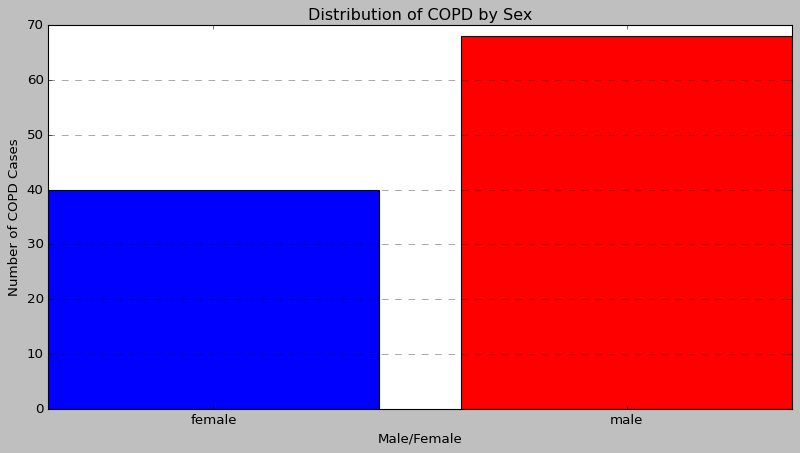

In [3477]:
# Count COPD occurences grouped by Sex
copd_counts_by_male_female = merged_copd_dataset2_cleaned.groupby('Male/Female')['copd'].sum()

# Plot a simple bar graph showing the distribution of copd between men and women.
plt.figure(figsize=(12,6))    # Set the size of the bar chart.
plt.bar(copd_counts_by_male_female.index, copd_counts_by_male_female.values, color=['blue', 'red'], edgecolor='black')
# Set the names for the x-axis bars, set the colors of the bar and the edges. 

# Axis Labels and set the line style and transparency of the bars of 0.6.
plt.xlabel("Male/Female")
plt.ylabel("Number of COPD Cases")
plt.title("Distribution of COPD by Sex")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Render the plot 
plt.show()

This bar chart clearly shows that more men than women have copd. 

In [3478]:
# If the percentage is high, heart disease and COPD might be connected. IHD = Ischemic Heart Disease. 

merged_copd_dataset2_cleaned.groupby('IHD')['copd'].describe()

,count,mean,std,min,25%,50%,75%,max
IHD,,,,,,,,
0,45,2,1,1,2,2,3,4
1,7,2,1,1,2,2,2,3


This shows that only 7 people with COPD also have IHD, so there seems to be a very low correlation between those 2 conditions/diseases. 

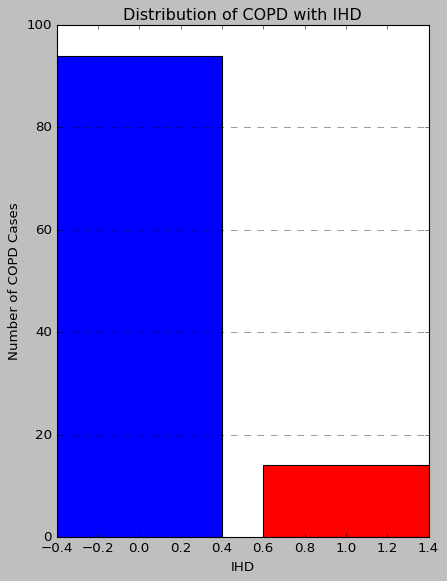

In [3479]:
# Count COPD occurences grouped with IHD
copd_counts_by_IHD = merged_copd_dataset2_cleaned.groupby('IHD')['copd'].sum()

# Plot a simple histogram 
plt.figure(figsize=(6,8))
plt.bar(copd_counts_by_IHD.index, copd_counts_by_IHD.values, color=['blue', 'red'], edgecolor='black')

# Axis Titles
plt.xlabel("IHD")
plt.ylabel("Number of COPD Cases")
plt.title("Distribution of COPD with IHD")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

As the statistical data showed earlier, this bar plot shows little to no correlation between IHD and COPD.  

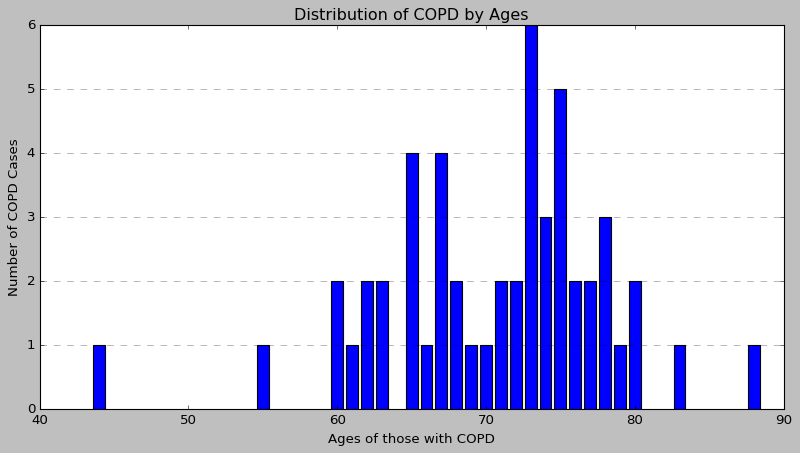

In [3480]:
# Count COPD occurences grouped by Ages
Ages_counts_by_ages = merged_copd_dataset2_cleaned.groupby('Ages')['copd'].count()

# Plot a simple histogram 
plt.figure(figsize=(12,6))    # size of the histogram
plt.bar(Ages_counts_by_ages.index, Ages_counts_by_ages.values, color=['blue'], edgecolor='black')
# Names of the bars on the x-axis, and the values for the y-axis, and the color of the bars and the edge 
# color of the bars.

# Axis Titles
plt.xlabel("Ages of those with COPD")
plt.ylabel("Number of COPD Cases")
plt.title("Distribution of COPD by Ages")
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Format information for the y-axis to create a grid with -- lines, and 
# the transparency of the bars. 

# Render the histogram.
plt.show()

This histogram clearly shows that the most common age when copd cases start increasing is around 60 and the number increase into the late 60's.  It dips at age 70, then spikes in the mid-70's. This could be due to an increase in all 4 phases as those with copd age. The decreases, I would think, would be attributed to the death rate of those with stage 4. 
Since it is a progressive disease the number of cases decrease in the late 70's and 80's due to the death rate in other words. 

In [3481]:
# Just wanted to get an idea of what values to expect in the PackHistory field in the following chart. 

merged_copd_dataset2_cleaned['PackHistory'].describe

<bound method NDFrame.describe of 0      60
1      50
2      11
3      26
4      50
5      75
6      78
7     109
8      40
9      75
10     45
11     67
12     38
13     31
14     75
15      1
16     30
17     38
18     23
19     11
20     66
21     64
22     50
23     20
24     37
25     36
26     55
27     59
28     34
29     20
30     44
31     14
32     45
33     20
34    100
35     55
36     80
37      5
38     60
39     30
40     50
41      6
42     20
43      8
44     75
45      9
46     10
47     20
48     30
49     25
50     40
51     30
Name: PackHistory, dtype: int64>

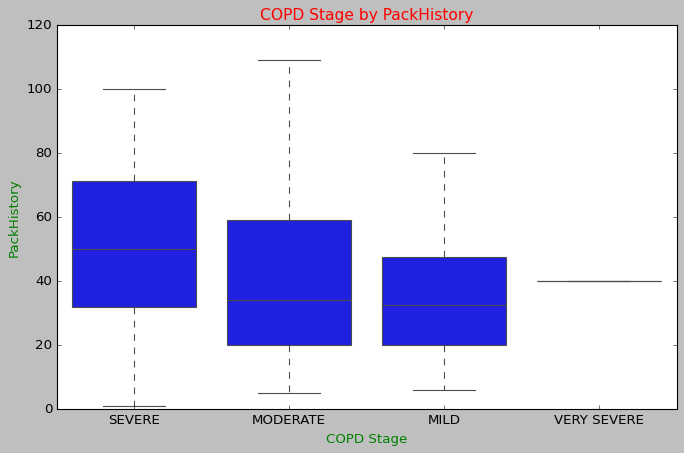

In [3482]:
# Sns boxplot shows the median values of COPDSEVERITY, by PackHistory. 
# First needed to import the sns pandas library.

# Set the figure size
plt.figure(figsize=(10,6))

# Create the box plot
sns.boxplot(x='COPDSEVERITY', y='PackHistory', data=merged_copd_dataset2_cleaned)

# Add titles and labels
plt.title('COPD Stage by PackHistory', fontsize=14, color='red')
plt.xlabel('COPD Stage', fontsize=12, color='green')
plt.ylabel('PackHistory', fontsize=12, color='green')

# Show the plot
plt.show()


This chart shows a definite correlation between number of years of packHistory and the severity (stage) of COPD, until it gets to 'VERY SEVERE'.  This could be because once someone reaches the VERY SEVERE stage, the prognosis of still being alive in 5 years is very low (per the GOLD standard).  

End-Stage COPD: per The Global Initiative for Chronic Obstructive Lung Disease (GOLD) system categorizes COPD severity into stages, with stage 4 representing very severe COPD (FEV1 less than 30%).
In end-stage COPD (stage 4), symptoms like coughing and shortness of breath worsen and can become life-threatening. 
5-Year Survival Rate:
The 5-year survival rate for COPD patients varies depending on the severity of the disease, with studies indicating a range of 40% to 70%

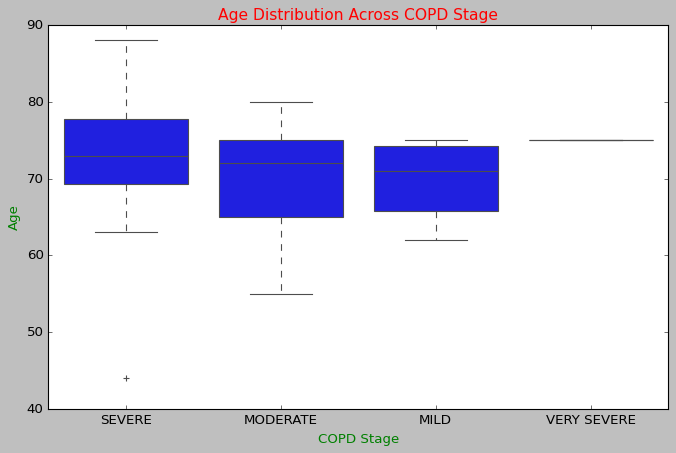

In [3483]:
# Create a Box Plot to show the distribution of median value of the severity of COPD by age, to see if
# there is a trend that COPD becomes more severe with age. 

# Set the figure size
plt.figure(figsize=(10,6))

# Create the box plot
sns.boxplot(x='COPDSEVERITY', y='Ages', data=merged_copd_dataset2_cleaned)

# Add titles and labels
plt.title('Age Distribution Across COPD Stage', fontsize=14, color='red')
plt.xlabel('COPD Stage', fontsize=12, color='green')
plt.ylabel('Age', fontsize=12, color='green')

# Show the plot
plt.show()

This box plot reinforces what the histogram showed above.
It clearly shows that the median common age when copd cases start increasing is around 60 and the number of SEVERE cases increasing into the late the 70's. 
There is only 1 case of SEVERE COPD listed so the median is also 1. 
The sharp sudden decrease, I believe, would be attributed to the death rate of those with stage 4 COPD. 

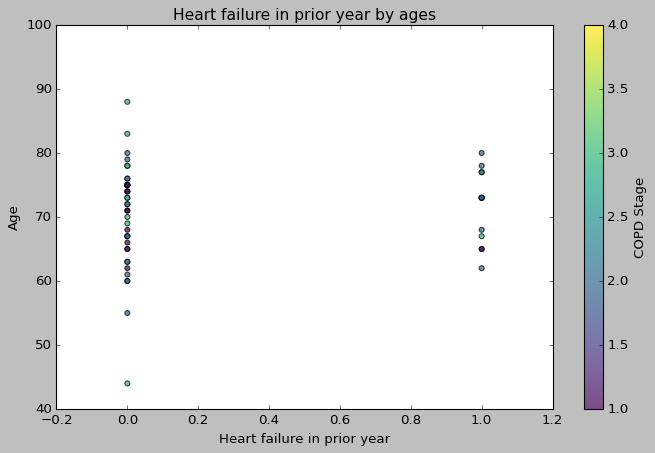

In [3484]:
# Create a scatter plot to show any correlation between Heart failure in prior year, and COPD by ages.
# (the directions for this plot found on Stack Overflow). 

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Create the scatterplot
plt.scatter(merged_copd_dataset2_cleaned['Heart failure in prior year'], # x-axis
            merged_copd_dataset2_cleaned['Ages'],   #y-axis
            c=merged_copd_dataset2_cleaned['copd'],
            cmap='viridis',
             alpha=0.7 
)

# Add titles and labels
plt.title('Heart failure in prior year by ages', fontsize=14)
plt.xlabel('Heart failure in prior year', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.colorbar(label='COPD Stage')

# Show the plot
plt.show()

This scatter plot clearly shows a very low correlation between COPD and Heart Failure in the past year. This could be because it would be very difficult, though not impossible, for a patient to survive the combination of copd and Heart Failure in the past year. 

The plan is to add additional visualizations looking at additional relationships, comorbidities and other factors to see the relationships with COPD. Also, the plan is to go deeper and analyze if Pulmonary Rehabilitation improves the condition and life expectancy. 